In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv
#importing all the libraries
file_obj=open('zomato.csv',encoding='utf-8')
df=pd.read_csv(file_obj)

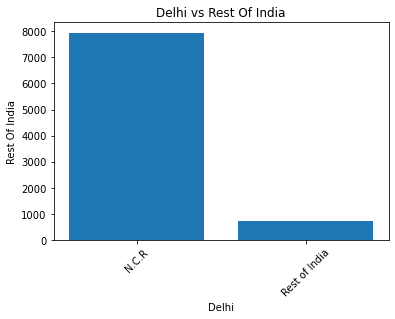

In [3]:
#Q1 part1
df['City']= df['City'].replace("Faridabad", "N.C.R")
df['City']=df['City'].replace('New Delhi','N.C.R')
df['City']=df['City'].replace('Gurgaon','N.C.R')
df['City']=df['City'].replace('Noida','N.C.R')
df['City']=df['City'].replace('Ghaziabad','N.C.R')
#converting all the regions to be included in NCR ,NCR
df2=df[df['City']=='N.C.R']
df2
len(df2)
#finding lenght of df which will be equal to number of restaurant present in NCR
df3=df[df['City']!='N.C.R']
#selecting citites for rest of India
df3=df3[df3['Country Code']==1]
#slicing to find only indian cities
len(df3)
#finding lenght of df which will be equal to number of restaurant present in rest of India
x=['N.C.R','Rest of India']
y=[len(df2),len(df3)]
plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("Delhi")
plt.ylabel("Rest Of India")
plt.title("Delhi vs Rest Of India")
plt.show()
#plotting Graph


In [4]:
df2
unique=df2["Cuisines"].unique()
unique=list(unique)
unique
#finding unique cuisines present in INDIA
s={}
x=[]
for i in unique:

    x.append(i.strip().split(","))
#appending comma including values which are unique into  a list x    
for k in x:
    for i in k:  
        if i in s:
            s[i.strip()]+=1
        else :
            s[i.strip()]=1
#stripping and adding to a dictionary            
            
st=set()
for i in s:
    st.add(i)
st
#putting values in set so only unique values are appended


{'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'Bakery',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'British',
 'Burger',
 'Burmese',
 'Cafe',
 'Charcoal Grill',
 'Chettinad',
 'Chinese',
 'Continental',
 'Cuisine Varies',
 'Deli',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Goan',
 'Greek',
 'Gujarati',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kerala',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Moroccan',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Pakistani',
 'Parsi',
 'Persian',
 'Pizza',
 'Portuguese',
 'Rajasthani',
 'Raw Meats',
 'Salad',
 'Sandwich',
 'Seafood',
 'South American',
 'South Indian',
 'Spanish',
 

In [5]:
#Q1 part 2
df3
uni=df3["Cuisines"].unique()
uni=list(uni)
uni
d={}
y=[]
for i in uni:
# doing similar for Rest of Indian cities
    y.append(i.strip().split(","))
for k in y:
    for i in k:  
        if i in d:
            d[i.strip()]+=1
        else :
            d[i.strip()]=1
st1=set()
for i in d:
    st1.add(i)
    #adding to a set , for Indian values
z=st1.difference(st)
#finding cuisines not present in Delhi but in rest of India
z#Dishes not in delhi
    

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [6]:
#answer explanation Q1 part 2 
import requests
from requests.auth import HTTPBasicAuth
header={"user-key": "410586e820e1fa578d47d77149ab24d4"}
a=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params={'city_id':'11902'})
a
k=a.json()
k=k['cuisines']
k
#as we can see BBQ is present in delhi and rest all not present ,so dataset is a little incomplete

[{'cuisine': {'cuisine_id': 152, 'cuisine_name': 'African'}},
 {'cuisine': {'cuisine_id': 280, 'cuisine_name': 'Author'}},
 {'cuisine': {'cuisine_id': 193, 'cuisine_name': 'BBQ'}},
 {'cuisine': {'cuisine_id': 5, 'cuisine_name': 'Bakery'}},
 {'cuisine': {'cuisine_id': 270, 'cuisine_name': 'Beverages'}},
 {'cuisine': {'cuisine_id': 159, 'cuisine_name': 'Brazilian'}},
 {'cuisine': {'cuisine_id': 168, 'cuisine_name': 'Burger'}},
 {'cuisine': {'cuisine_id': 30, 'cuisine_name': 'Cafe'}},
 {'cuisine': {'cuisine_id': 25, 'cuisine_name': 'Chinese'}},
 {'cuisine': {'cuisine_id': 1040, 'cuisine_name': 'Coffee'}},
 {'cuisine': {'cuisine_id': 881, 'cuisine_name': 'Crepes'}},
 {'cuisine': {'cuisine_id': 100, 'cuisine_name': 'Desserts'}},
 {'cuisine': {'cuisine_id': 40, 'cuisine_name': 'Fast Food'}},
 {'cuisine': {'cuisine_id': 271, 'cuisine_name': 'Finger Food'}},
 {'cuisine': {'cuisine_id': 187, 'cuisine_name': 'Fresh Fish'}},
 {'cuisine': {'cuisine_id': 314, 'cuisine_name': 'Gourmet Fast Food'}},


In [7]:
#Q1 p3
k=df2['Cuisines']#using data frame sliced for delhi values in above question
d={}
x=[]
y=[]
k.dropna(inplace=True)
for i in k:
    x.append(i.split(","))
#splitting the cusine values and appending in an list    
for i in x:
    for j in i:
        y.append(j.strip())
#stripping the cusine values and appending in other list
for i in y:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
#appending values of liat into dictionary            
d  
sort_orders = sorted(d.items(), key=lambda x: x[1])
sort_orders_delhi=sort_orders[-10:]
#sorting dictionary based on values and finding Top 10
sort_orders_delhi#Top 10 of Delhi
k=df3['Cuisines']
#using data frame sliced for Indian values in above question
k
d={}
x=[]
y=[]
k.dropna(inplace=True)
for i in k:
    x.append(i.split(","))
for i in x:
    for j in i:
        y.append(j.strip())

for i in y:
        if i in d:
            d[i]+=1
        else:
            d[i]=1  
            
#Doing same as above for Indian values
sort_orders1 = sorted(d.items(), key=lambda x: x[1])
sort_orders_India=sort_orders1[-10:]
sort_orders_India
      #TOP 10 Cuisines of India 


C:\Users\ajsre\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


[('Mexican', 50),
 ('Desserts', 55),
 ('Mughlai', 59),
 ('South Indian', 62),
 ('Fast Food', 97),
 ('Cafe', 136),
 ('Italian', 147),
 ('Continental', 177),
 ('Chinese', 242),
 ('North Indian', 349)]

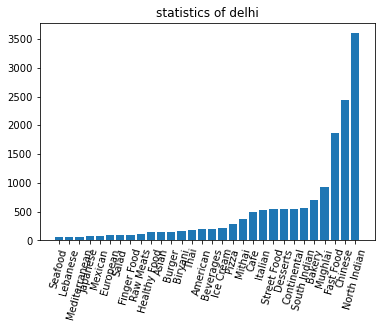

In [8]:
#Q1 p4 Using pie graphs we can see how delhi cuisines varies from rest of India

yd = [lis[1] for lis in sort_orders[-30:]] 
xd = [lis[0] for lis in sort_orders[-30:]] 
yr = [lis[1] for lis in sort_orders1[-30:]]           
xr = [lis[0] for lis in sort_orders1[-30:]]
plt.title('statistics of delhi')
plt.bar(xd,yd)
plt.xticks(rotation=75)
plt.show()
#plotting graph for delhi

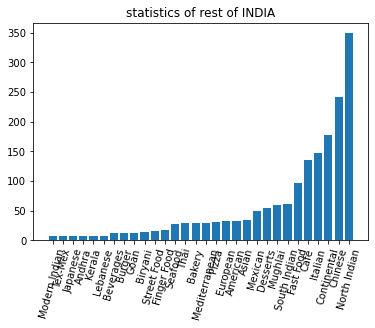

In [9]:
plt.title('statistics of rest of INDIA')
plt.bar(xr,yr)
plt.xticks(rotation=75)

plt.show()
#plotting graph for rest of India
#as we can see major differrenced between delhi and India is that other regions of India cater to Regional delicacies whereas Delhi
#being a metropoliton caters to International cuisine as well.